# 第三章习题3  Titanic 数据集上的分类

##  Prepare the data

In [97]:
# 导入数值计算包，里面有许多有用的函数
import numpy as np
# 导入数据操作包，可以查看、修改数据集，主要用在数据整理、统计、可视化阶段
import pandas as pd
# 比pandas更强大的绘图包
import matplotlib.pyplot as plt

In [98]:
# 将csv文件读入pandas的数据类型DataFrame中
train = pd.read_csv("datasets/titanic/train.csv")

*Take a glasp of dataset*

In [99]:
# 对数据有个大概的了解，可以知道每个特征的数据名称、类型、有多少行列、非空值的情况
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [100]:
# 导入validation集，这两个数据集是预先分好的，从Kaggle网站上下载时候就是这样。
data_val = pd.read_csv('datasets/titanic/test.csv')

In [101]:
# 了解validation集，Kaggle的validation集没有标签，比训练集少一列
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [102]:
# 更明显地显示每列的空值数目
data_val.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

*Check if there are repeated names*

In [103]:
# 查看数据集中是不是有重复的名字，将每个名字的重复次数存到变量name_count中
name_count = train["Name"].value_counts().values

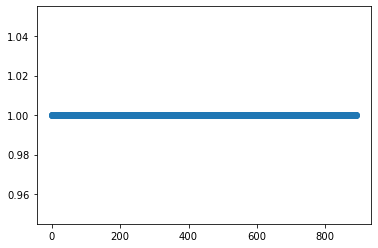

In [104]:
# 直观地显示有无重名的情况
plt.scatter(range(len(name_count)), name_count)

In [105]:
# 看一下训练集的结构是什么的，显示头5行
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
# 看一下训练集的结构是什么的，显示后5行
train.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
# 为了避免数据排列有某种结构，对训练集乱序抽样10次
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
795,796,0,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.0000,NaN,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
604,605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.5500,NaN,C
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B96 B98,S
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.5250,NaN,S
744,745,1,3,"Stranden, Mr. Juho",male,31.0,0,0,STON/O 2. 3101288,7.9250,NaN,S
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S
467,468,0,1,"Smart, Mr. John Montgomery",male,56.0,0,0,113792,26.5500,NaN,S
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S


In [107]:
# 显示训练集每一列的名称
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [108]:
# 显示训练集每列的空值情况
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [109]:
# 显示训练的哪些列有空值
train.columns[train.isna().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [15]:
# 以boolean的形式显示哪些列有空值（用以练习pandas命令，可忽略）
train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [110]:
# 显示所有列的统计情况（不仅numeric类型），可以知道训练集每列的最大值，最小值，是不是有偏斜，非空值的数目等
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Lehmann, Miss. Bertha",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [111]:
# 显示catogrical的类型都有多少种类，每个种类出现了多少次，它是以降序排列的
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

*Show digital data in figures*

In [112]:
# 将'Survived'列取出赋值给新变量，它是有监督学习问题的标签，是pd.Series类型
train_label = train["Survived"]
# 将pd.Series类型的数据取出为ndarray类型，存到y_train中，因为sklearn不能处理pandas的数据类型，要用ndarray.
y_train = train_label.values

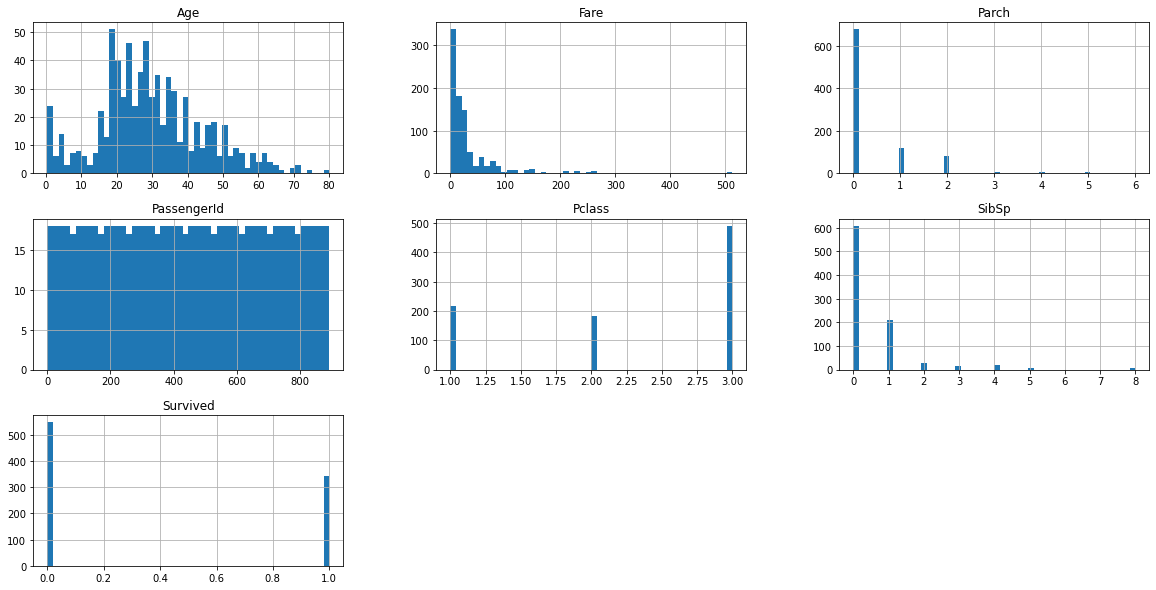

In [113]:
# 先对训练集进行单变量可视化分析，也许对后面建模和数据整理有用
# 获得每列数据的直观分布情况，可以看到Fare列数据是有偏斜的，age列差不多是正态分布的
train.hist(bins=50,figsize=(20,10));

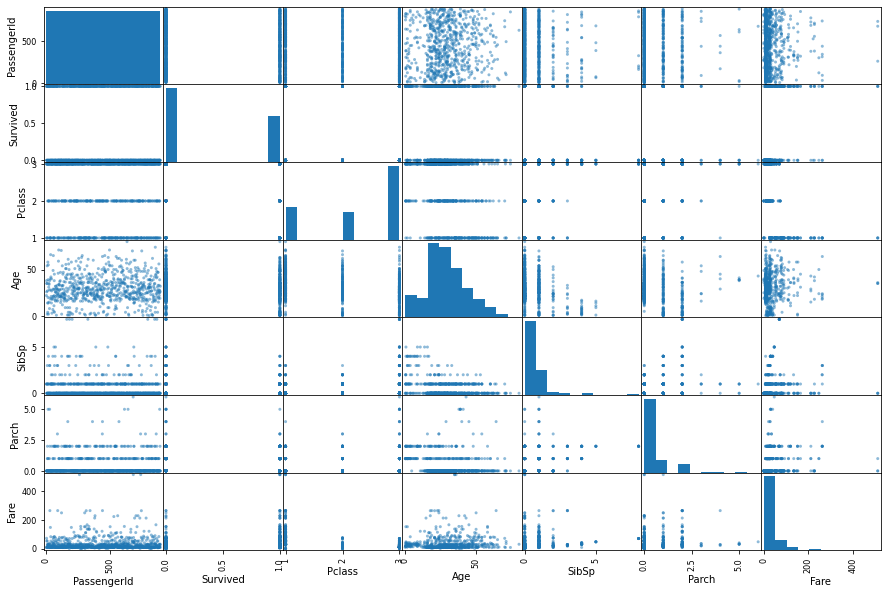

In [119]:
# 暴力绘制两两变量的散点图，不一定能得到有用信息，对角线是上面的单变量图
pd.plotting.scatter_matrix(train, figsize=(15,10));

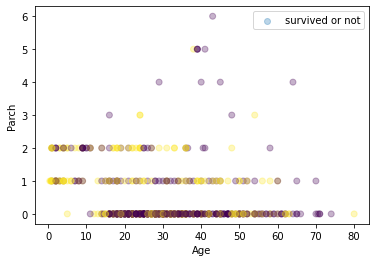

In [121]:
# 练习绘制三个变量的散点图，没有得到有用信息
plt.scatter(train["Age"], train["Parch"], c=train_label, alpha=0.3,label='survived or not');
plt.xlabel("Age")
plt.ylabel("Parch")
plt.legend()

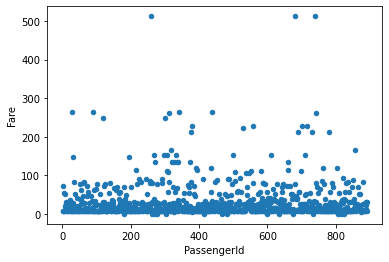

In [21]:
# 练习绘图
train.plot(kind='scatter',x='PassengerId',y='Fare')

In [122]:
# 以Sex为变量观察生还情况，女性生还的概率明显高于男性
train[['Survived', 'Sex']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [23]:
# 在不同港口上船的人生还概率基本相同
train[['Survived', 'Embarked']].groupby('Embarked',as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


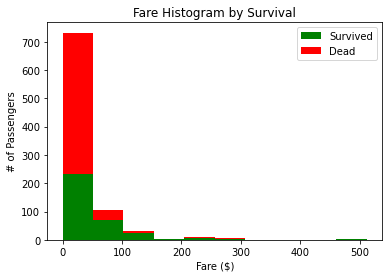

In [123]:
# 不同船票价格的人生还与遇难人数对比
plt.hist(x = [train[train['Survived']==1]['Fare'], train[train['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

*Clean the data*

In [124]:
# 去掉标签列后将训练集备份到新的pd.DataFrame
train_feat = train.drop("Survived", axis=1)
#train_feat.info()

In [125]:
# 创建一个列表，用于同时清理训练集的特征与validation集
data_cleaner = [train_feat, data_val]

In [126]:
for data in data_cleaner:
    data['Age'].fillna(data['Age'].median(), inplace=True) # 用中值来填充age列的空值，发生inplace改变
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True) # 用最多出现的值来填充catogrical变量
    data['Fare'].fillna(data['Fare'].median(), inplace=True) # 用中值填充fare列空值

In [127]:
# 将要丢弃的列名存在一个新列表里
exclude_index = ['PassengerId', 'Ticket', 'Cabin']
# 丢弃上面的列的数据，因为我认为对预测没有影响，是无关变量
train_feat.drop(exclude_index, axis=1, inplace=True)

In [128]:
# 重新统计训练集特征的空值情况，确定是否清理干净
train_feat.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [129]:
# 统计validation集的特征空值情况
data_val.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [130]:
# 查看一下名称是什么的，有没有可提取的相关变量？发现有重复出现的头衔，如Mrs, Miss
train_feat['Name'].sample(10)

537                                  LeRoy, Miss. Bertha
100                              Petranec, Miss. Matilda
323    Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...
153                      van Billiard, Mr. Austin Blyler
239                               Hunt, Mr. George Henry
185                                Rood, Mr. Hugh Roscoe
862    Swift, Mrs. Frederick Joel (Margaret Welles Ba...
506        Quick, Mrs. Frederick Charles (Jane Richards)
555                                   Wright, Mr. George
642                        Skoog, Miss. Margit Elizabeth
Name: Name, dtype: object

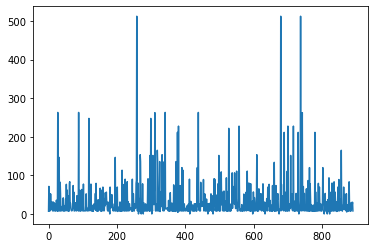

In [136]:
# 查看Fare的分布情况
train_feat['Fare'].plot();

In [132]:
# 构建新的特征，如是不是单独一个人，家庭成员数量，头衔
for dataset in data_cleaner:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['Alone'] = 1
    dataset['Alone'].loc[dataset['FamilySize'] > 1] = 0 
    dataset['Title'] = dataset['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4) # 将船票费分割成4段，可以减少噪声干扰
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 4) # 同上
#     dataset['Title'] = dataset['Title'].apply(lambda x: 'Misc' if title_name[x] else x)

In [134]:
# 查看新建特征是否成功
train_feat[['Alone', 'FamilySize', 'SibSp', 'Parch', 'Title', 'AgeBin', 'FareBin']].sample(10)

,Alone,FamilySize,SibSp,Parch,Title,AgeBin,FareBin
363,1,1,0,0,Mr,"(32.0, 48.0]","(-0.001, 7.91]"
709,0,3,1,1,Master,"(16.0, 32.0]","(14.454, 31.0]"
829,1,1,0,0,Mrs,"(48.0, 64.0]","(31.0, 512.329]"
263,1,1,0,0,Mr,"(32.0, 48.0]","(-0.001, 7.91]"
93,0,4,1,2,Mr,"(16.0, 32.0]","(14.454, 31.0]"
481,1,1,0,0,Mr,"(16.0, 32.0]","(-0.001, 7.91]"
232,1,1,0,0,Mr,"(48.0, 64.0]","(7.91, 14.454]"
117,0,2,1,0,Mr,"(16.0, 32.0]","(14.454, 31.0]"
445,0,3,0,2,Master,"(-0.08, 16.0]","(31.0, 512.329]"
175,0,3,1,1,Mr,"(16.0, 32.0]","(-0.001, 7.91]"


In [137]:
# 查看头衔列的计数情况，有哪些列的头衔数量少于10，并存成boolean数组，以备后用
title_name = train_feat['Title'].value_counts() < 10
#title_name['Mr']
title_name

Mr              False
Miss            False
Mrs             False
Master          False
Dr               True
Rev              True
Major            True
Col              True
Mlle             True
the Countess     True
Ms               True
Jonkheer         True
Lady             True
Mme              True
Sir              True
Don              True
Capt             True
Name: Title, dtype: bool

In [138]:
# 用lambda函数将数量小于10的头衔改为Misc，杂项
train_feat['Title'] = train_feat['Title'].apply(lambda x: 'Misc' if title_name[x] else x)

In [139]:
# 确认是否修改成功
train_feat['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64

In [140]:
# 用sklearn的LabelEncoder把catogarical变量类型转成标量数字型，也可以转成矢量OneHot型以消除排序和距离的影响
from sklearn.preprocessing import LabelEncoder 
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

In [39]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# # label = LabelEncoder()
# label = OneHotEncoder()
# for dataset in data_cleaner:    
#     dataset['Sex_Code'] = label.fit_transform(dataset['Sex'].values.reshape(-1,1))
#     dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'].values.reshape(-1,1))
#     dataset['Title_Code'] = label.fit_transform(dataset['Title'].values.reshape(-1,1))
#     dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'].astype(str).values.reshape(-1,1))
#     dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'].astype(str).values.reshape(-1,1))

In [141]:
# 丢弃被转换的catogrical变量
drop_columns = ['Name', 'Sex', 'Embarked', 'Title', 'AgeBin', 'FareBin']
train_feat.drop(drop_columns, axis=1, inplace=True)
data_val.drop(drop_columns, axis=1, inplace=True)

In [142]:
# 丢弃validation集中的列
data_val.drop(exclude_index, axis=1, inplace=True)

In [143]:
# 确认训练集清理情况，全部为非空值，全为数字类型
train_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         891 non-null    int64  
 1   Age            891 non-null    float64
 2   SibSp          891 non-null    int64  
 3   Parch          891 non-null    int64  
 4   Fare           891 non-null    float64
 5   FamilySize     891 non-null    int64  
 6   Alone          891 non-null    int64  
 7   Sex_Code       891 non-null    int64  
 8   Embarked_Code  891 non-null    int64  
 9   Title_Code     891 non-null    int64  
 10  AgeBin_Code    891 non-null    int64  
 11  FareBin_Code   891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [144]:
# 确认validation集清理情况，全部为非空值，全为数字类型
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         418 non-null    int64  
 1   Age            418 non-null    float64
 2   SibSp          418 non-null    int64  
 3   Parch          418 non-null    int64  
 4   Fare           418 non-null    float64
 5   FamilySize     418 non-null    int64  
 6   Alone          418 non-null    int64  
 7   Sex_Code       418 non-null    int64  
 8   Embarked_Code  418 non-null    int64  
 9   Title_Code     418 non-null    int64  
 10  AgeBin_Code    418 non-null    int64  
 11  FareBin_Code   418 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 39.3 KB


In [146]:
# 确认训练集和validation集是否指标对齐
a = (train_feat.columns == data_val.columns).any()
a

True

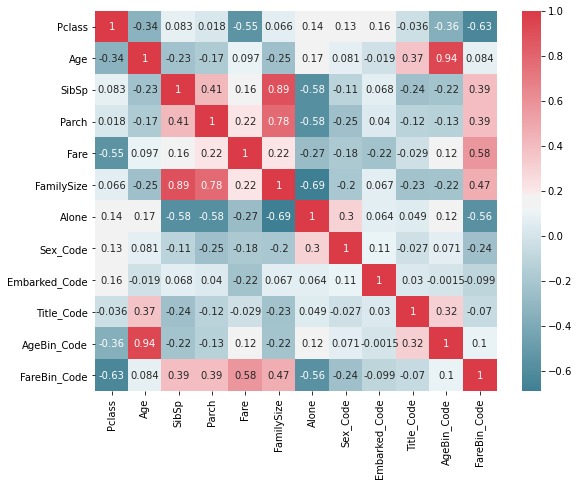

In [148]:
# 查看变量之间的相关性，数字绝对值大的相关性高
import seaborn as sns
plt.figure(figsize=(9,7))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(train_feat.corr(), annot=True, cmap=colormap)

*split train and test*

In [150]:
# 将训练集再分为更小的训练集和测试集，以8：2分割，输出它们的尺寸，确认是否正确
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_feat.values,
                                                    train['Survived'].values,
                                                    test_size=0.2,
                                                    random_state=42
                                                   )
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 12), (712,), (179, 12), (179,))

*model data: randomforest*

In [151]:
# 用随机森林的sklearn的默认参数来训练，并比较它们在训练集和测试集上的评分，分现过拟合了！同时输出了各个特征的重要性
from sklearn.ensemble import RandomForestClassifier
alg = RandomForestClassifier() # 是决策树的bagging策略实现，决策树很容易过拟合！
alg.fit(X_train, y_train) # 在训练集上拟合模型参数
print(alg.score(X_train, y_train), alg.score(X_test, y_test)) # 输出在训练集和测试集上的评分
for feat, score in zip(train_feat.columns, alg.feature_importances_): # 输出特征重要性
    print(feat,": ", score)

0.9817415730337079 0.8435754189944135
Pclass :  0.07251609748930497
Age :  0.19563799644467963
SibSp :  0.03284322421920278
Parch :  0.020202534698004676
Fare :  0.21364135320539973
FamilySize :  0.04542178286828071
Alone :  0.00996563407112415
Sex_Code :  0.1817765779514103
Embarked_Code :  0.031142150716622914
Title_Code :  0.11761146126917948
AgeBin_Code :  0.036690811335017344
FareBin_Code :  0.04255037573177334


In [152]:
# 对特征重要性排序并输出，最重要的特征是船票价格、性别、年龄
b = np.c_[train_feat.columns, alg.feature_importances_]
sorted(b, key=lambda x:x[1],reverse=True )

[array(['Fare', 0.21364135320539973], dtype=object),
 array(['Age', 0.19563799644467963], dtype=object),
 array(['Sex_Code', 0.1817765779514103], dtype=object),
 array(['Title_Code', 0.11761146126917948], dtype=object),
 array(['Pclass', 0.07251609748930497], dtype=object),
 array(['FamilySize', 0.04542178286828071], dtype=object),
 array(['FareBin_Code', 0.04255037573177334], dtype=object),
 array(['AgeBin_Code', 0.036690811335017344], dtype=object),
 array(['SibSp', 0.03284322421920278], dtype=object),
 array(['Embarked_Code', 0.031142150716622914], dtype=object),
 array(['Parch', 0.020202534698004676], dtype=object),
 array(['Alone', 0.00996563407112415], dtype=object)]

*overfit! evaluate modes by corss-validating* 用交叉验证来评估模型，以防止过拟合

In [154]:
# 文章DOI: 10.1145/1143844.1143865 比较了有监督的二分类算法，结果为提升树、随机森林等集成模型在11种问题的八个指标上表现最好
# 所以我优先使用了这几个模型，先使用默认参数，sklearn的默认参数一般表现还行
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
# 支持向量机一般在小而复杂的数据集上表现良好
from sklearn.svm import SVC
algs = [RandomForestClassifier(), # 随机森林
       GradientBoostingClassifier(), # 梯度提升树，拟合残差
       AdaBoostClassifier(), # 自适应梯度提升树，更新困难实例的权重
       SVC()] # 支持向量分类，默认内核'rbf'
for alg in algs:
    score = cross_val_score(alg, X_train, y_train, cv=5) # 用交叉验证来计算模型分数，默认accuracy, 5重分割
#     score_test = cross_val_score(alg, X_train, y_train, cv=5) # 这里写错了
    print(alg.__class__.__name__,':', score.mean()) #, '   test:', score_test.mean()) # 输出模型评分

RandomForestClassifier : 0.7949670048261597
GradientBoostingClassifier : 0.8145868216290753
AdaBoostClassifier : 0.8159657244164287
SVC : 0.6713188220230475


- 提前停止法，用于防止过拟合，后面没有用到

In [155]:
import warnings
warnings.filterwarnings("ignore")

n_estimators = 120
learning_rate = 0.1
max_depth = 2
current_error = 0
count = 0
gbdt = GradientBoostingClassifier(learning_rate=learning_rate,
                                 max_depth=max_depth,
                                 warm_start=True)
error = pd.DataFrame(columns = ['score'])
for epoch in range(n_estimators):
    gbdt.n_estimators = epoch
    score = cross_val_score(gbdt, X_train, y_train, cv=5).mean()
#     print(epoch, score)
    error.loc[epoch, 'score'] = score
    if score > current_error:
        current_error = score
        count = 0
    else:
        count += 1
        if count > 5:
            break


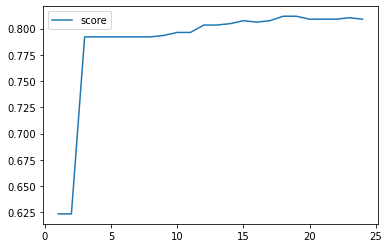

In [156]:
# 绘制评分的变化曲线
error.plot(kind='line');

- 随机网格搜索 在参数较多时使用，先大致计算参数区间，再进行细致地搜索

0.8201713779178567


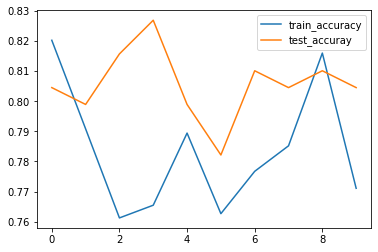

In [68]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, classification_report

# 新建一个空的pd.DataFrame,用于存贮计算结果
error_grid = pd.DataFrame()
# 用以标记计算结果的行
ind = 0
# MLA = [LinearRegression(),
#        ElasticNet(),
#        SVC(),
#        DecisionTreeClassifier(),
#        RandomForestClassifier(),
#        AdaBoostClassifier(),
#        GradientBoostingClassifier()
#       ]

# 梯度提升树
gbdt = GradientBoostingClassifier()
param_grid = {'n_estimators': range(20,200),  # 决策树的数目
              'max_depth': range(1, 30),  # 决策树所能产生的最大层数
              'learning_rate': [0.01, 0.03, 0.1, 0.2, 0.3] # 集成参数，相当于相邻决策树的步长
             }
grid_search = RandomizedSearchCV(gbdt, param_grid, cv=5, scoring='accuracy') # 定义的要搜索的参数网格及模型，评分方法
grid_search.fit(X_train, y_train) # 搜索网格
# r2_score(grid_search.best_estimators_.predict(X_test), y_test)
cv_results = grid_search.cv_results_ # 网格搜索结果存在变量中

for mean_score, param in zip(cv_results['mean_test_score'], cv_results['params']):
#     error_grid.loc[ind, 'scorer'] = grid_search.scorer_
    error_grid.loc[ind, 'train_accuracy'] = mean_score # 每个网格点上的训练分数
    model = gbdt.set_params(**param) # 取出每个格点上的模型参数
    model.fit(X_train, y_train) # 重新训练，为了得到测试集上的评分（应该有其他方法避免再次训练）
    error_grid.loc[ind, 'test_accuray'] = model.score(X_test, y_test) # 计算每个模型测试集上的评分
    error_grid.loc[ind, 'n_estimators'] = param['n_estimators'] # 决策树的数量
    error_grid.loc[ind, 'max_depth'] = param['max_depth'] # 决策树的深度
    error_grid.loc[ind, 'learning_rate'] = param['learning_rate'] # 集成的学习率，可以用以正则化
    ind += 1
# print(error_grid)
print(error_grid.train_accuracy.max()) # 输出最高得分
error_grid[['train_accuracy', 'test_accuray']].plot(kind='line'); # 绘制评分

In [69]:
# 网格搜索结果
error_grid 

,train_accuracy,test_accuray,params,n_estimators,max_depth,learning_rate
0,0.820171,0.804469,NaN,63.0,3.0,0.10
1,0.790791,0.798883,NaN,116.0,12.0,0.30
2,0.761243,0.815642,NaN,144.0,27.0,0.01
3,0.765458,0.826816,NaN,23.0,29.0,0.20
4,0.789382,0.798883,NaN,190.0,12.0,0.20
5,0.762651,0.782123,NaN,190.0,16.0,0.03
6,0.776697,0.810056,NaN,190.0,18.0,0.20
7,0.785157,0.804469,NaN,176.0,16.0,0.30
8,0.815926,0.810056,NaN,34.0,2.0,0.30
9,0.771073,0.804469,NaN,79.0,16.0,0.10


- 网格搜索超参 与上面基本相同，评分并没有得到较大提高

In [71]:
error_grid2 = pd.DataFrame()#columns = ['train_accuracy', 'test_accuray', 'params'])
ind = 0
gbdt = GradientBoostingClassifier()
param_grid = {'n_estimators': range(2, 60),
             'max_depth': range(2, 10),
             'learning_rate': [0.01, 0.03, 0.1, 0.2, 0.3]
             }
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(gbdt, param_grid, cv=5, scoring='accuracy') 
grid_search.fit(X_train, y_train)
# r2_score(grid_search.best_estimators_.predict(X_test), y_test)
cv_results = grid_search.cv_results_

for mean_score, param in zip(cv_results['mean_test_score'], cv_results['params']):
#     error_grid.loc[ind, 'scorer'] = grid_search.scorer_
    error_grid2.loc[ind, 'train_accuracy'] = mean_score
    model = gbdt.set_params(**param)
    model.fit(X_train, y_train)
    error_grid2.loc[ind, 'test_accuray'] = model.score(X_test, y_test)
    error_grid2.loc[ind, 'n_estimators'] = param['n_estimators']
    error_grid2.loc[ind, 'max_depth'] = param['max_depth']
    error_grid2.loc[ind, 'learning_rate'] = param['learning_rate'] 
    ind += 1
error_grid2

,train_accuracy,test_accuray,n_estimators,max_depth,learning_rate
0,0.623599,0.586592,2.0,2.0,0.01
1,0.623599,0.586592,3.0,2.0,0.01
2,0.623599,0.586592,4.0,2.0,0.01
3,0.623599,0.586592,5.0,2.0,0.01
4,0.623599,0.586592,6.0,2.0,0.01
...,...,...,...,...,...
2315,0.782380,0.810056,55.0,9.0,0.30
2316,0.779563,0.821229,56.0,9.0,0.30
2317,0.795036,0.815642,57.0,9.0,0.30
2318,0.780971,0.826816,58.0,9.0,0.30


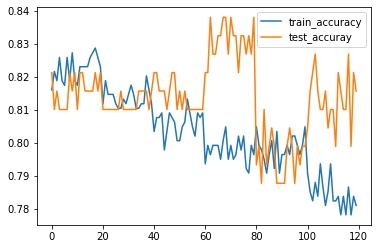

In [55]:
error_grid2.plot(kind='line')

In [74]:
# 输出最高评分的参数
error_grid2[error_grid2.test_accuray == error_grid2.test_accuray.max()]

,train_accuracy,test_accuray,n_estimators,max_depth,learning_rate
923,0.800591,0.854749,55.0,9.0,0.03


- 多个算法的网格搜索 用以投票集成

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# 将要投票集成的算法写进列表
clf_list = [KNeighborsClassifier(),
          LogisticRegression(),
          LinearDiscriminantAnalysis(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          SVC(),
          GradientBoostingClassifier()]

# 下面是每个算法的网格参数
knn_params = {'n_neighbors':np.linspace(1,50,5, dtype=int), # 用于预测的k数值
             'weights':['uniform','distance'],  # 权重模式
             'metric':['euclidean','minkowski']} # 度量距离的方法

lg_params = {'penalty':['l1','l2'], # 正则化方法，岭正则，Lasso正则
            'C':np.logspace(-1,0,6)} # 正则化程度的高低

lda_prarams = {'solver':['svd','eigen']} # 矩阵分解方法


dt_params = {'criterion':['gini','entropy'], # 分支的寻找标准
             'min_samples_leaf':range(1,65,10), # 每个叶节点的最小实例数
             'max_depth':range(1,20,3)}  # 深度

rf_params = {'n_estimators':range(100,301,100), # 决策树个数
             'bootstrap':[False]} # 抽样时是否放回

svc_params = {'C':np.logspace(0,2,4), # 正则化参数
             'gamma':np.logspace(-1,0,4), # 正则化参数，控制决策边界的精细程度
             'probability':[True], # 是否用额外的方法取得预测概率，svm本身不能得到概率
             'kernel': ['rbf', 'linear', 'poly']} # 核技巧，高斯，线性，多项式

gbdt_params = {'n_estimators' : range(100, 301, 100), # 与随机森林的参数是相同的
             'min_samples_leaf':range(1,65,10), 
             'max_depth':range(1,20,3)} 

# 存在列表中，方便循环
grid_params = [knn_params, lg_params, lda_prarams, dt_params, rf_params, svc_params, gbdt_params]

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv_results = []
best_estimators = []

# 对不同算法，和网格进行循环
for clf, param in zip(clf_list, grid_params):
    # 定义搜索网格，使用了交叉验证
    gs  = GridSearchCV(estimator= clf, param_grid= param, cv= StratifiedKFold(5), scoring='accuracy')
    # 在网格上拟合
    gs.fit(X_train, y_train)
    # 取出最高分数
    cv_results.append(gs.best_score_)
    # 取出最高分数的模型参数
    best_estimators.append(gs.best_estimator_)
    # 输出模型与评分
    print(str(clf),'\n\naccuracy: ',gs.best_score_,'\n\n')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 

accuracy:  0.7134836993991923 


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 

accuracy:  0.7963360583078891 


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001) 

accuracy:  0.7934994582881907 


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
 

最高的分数是梯度提升树

In [96]:
from sklearn.ensemble import VotingClassifier

# 投票集成可以将不同算法的结果集成起来，相当于一种集体智慧得体现。算法的差异性越大，集成后的结果性能越好。
# 有两种方法，硬投票和软投票。软投票需要算法给出概率
for voting in ('hard', 'soft'):
    globals()['votingclf_' + voting] = VotingClassifier(estimators=[#('knn', best_estimators[0]),
                                             ('logreg', best_estimators[1]), # 线性回归 
                                             #('lda', best_estimators[2]), # 线性判别分析
                                             ('dt', best_estimators[3]), # 决策树
                                             ('rf', best_estimators[4]), # 随机森林
                                             ('svc', best_estimators[5]), #支持向量
                                             ('dbdt', best_estimators[6])], # 梯度提升树
                                             voting=voting) # 软投票或硬投票
    # 投合投票集成
    globals()['votingclf_' + voting] = globals()['votingclf_' + voting].fit(X_train, y_train)
    # 输出投票集成的结果
    print('accuracy for voting = {}: {}'.format(voting, globals()['votingclf_' + voting].score(X_train, y_train)))

accuracy for voting = hard: 0.9213483146067416
accuracy for voting = soft: 0.9438202247191011
